<a href="https://colab.research.google.com/github/mushroom3969/PyTorch_Class/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification

## 1. Make classification data

In [1]:
from sklearn.datasets import make_circles

# MAke 1000 samples
n_sample = 1000

# Create circle
X, y = make_circles(n_sample,
                   noise = 0.03,
                   random_state = 42)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X : {X[:5]}")
print(f"First 5 samples of y : {y[:5]}")

First 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : [1 1 1 1 0]


In [4]:
# Make DataFrame

import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


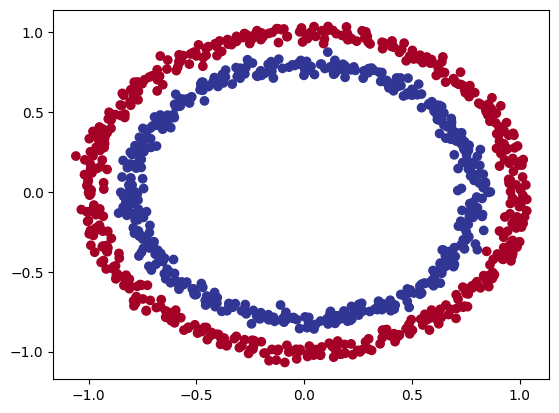

In [5]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Note : The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamental

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and tje same for y:{y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and tje same for y:1
Shape for one sample of X: (2,) and the same for y:()


## 1.2 Turn data into tensor and create train and test splits

In [8]:
import torch
torch.__version__

'2.1.0+cu121'

In [9]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

classify blue and red dots

To do so:
 1. Setup device agnositic code so our code will run on an accelerator(GPU)
 2. Construct a mode(by subclassing `nn.Module`)
 3. Define a loss function and optimizer
 4. Create a training and testing loop

In [12]:
# import pytorch and nn
import torch
from torch import nn

# Make device agnosstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Create a Model that:
1. subclasses `nn,Module`
2. Create 2 `nn.Linear` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass of the model
4. Instatiate an instance of our model class amd send it to the targer `device`

In [13]:
# 1. Contruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    #self.layer_1 = nn.Linear(in_features=2, out_features=5)
    #self.layer_2 = nn.Linear(in_features=5, out_features=1)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  # 3. Define a forward methos()
  def forward(self, x):
    #return self.layer2(self.layer_1(x))
    return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [14]:
device, next(model_0.parameters()).device

('cuda', device(type='cuda', index=0))

In [15]:
# Using nn.Sequemtial()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1571,  0.2720],
                      [-0.3502,  0.2341],
                      [ 0.3103,  0.1803],
                      [ 0.4885,  0.2429],
                      [ 0.6953,  0.3743]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2754,  0.4260, -0.3962, -0.6086,  0.6119], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1216,  0.1110, -0.2680,  0.1086, -0.2032]], device='cuda:0')),
             ('1.bias', tensor([0.4094], device='cuda:0'))])

In [17]:
# Make predictions
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}")
len(X_test), X_test.shape, untrained_pred[:10], y_test[:10]

Length of predictions: 200, Shape: torch.Size([200, 1])


(200,
 torch.Size([200, 2]),
 tensor([[0.4654],
         [0.3651],
         [0.5794],
         [0.4338],
         [0.3426],
         [0.2831],
         [0.1882],
         [0.1684],
         [0.5892],
         [0.3557]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

In [18]:
# Setup loss func
# loss_fn = nn.BCELoss() # BCELoss = require input to have gone the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [19]:
# Callculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/len(y_pred) * 100
  return acc

## 3. Train Model

training loop :

1. Forward pas
2. Claculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step(Gradient descent)

### 3.1 Going from raw logits -> prediction prob -> prediction label

Our model output are goint to be raw **logits**

We can convert these **logits** into **prediction probability** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for muliticlass classification)

Then we can convert our model's prediction probabilities to **prediciton labels** by either rounding them or taking the `argmax()`

In [20]:
# View the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logists = model_0(X_test.to(device))[:5]
y_logists

tensor([[0.4654],
        [0.3651],
        [0.5794],
        [0.4338],
        [0.3426]], device='cuda:0')

In [21]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logists)
y_pred_probs

tensor([[0.6143],
        [0.5903],
        [0.6409],
        [0.6068],
        [0.5848]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= .5, y=1 (Class1)
* `y_pred_probs` < .5 , y=0 (Class2)

In [22]:
# Find the predict labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### 3.2 Building the training and testing loop

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set epochs
epochs = 100

# Put the data to targe device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building train and evaluate loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  #loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expect prediction prob as input
  #               y_train)
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expect raw logits as input
                 y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer ste
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
      #1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      #2. Calculate test loss
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

  #Pring out
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {test_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f}")

Epoch: 0 | Loss: 0.71710, Acc: 50.00% | Test loss: 0.71037, Test acc:50.00
Epoch: 10 | Loss: 0.70191, Acc: 50.00% | Test loss: 0.69750, Test acc:50.00
Epoch: 20 | Loss: 0.69686, Acc: 60.00% | Test loss: 0.69357, Test acc:60.00
Epoch: 30 | Loss: 0.69507, Acc: 50.00% | Test loss: 0.69246, Test acc:50.00
Epoch: 40 | Loss: 0.69433, Acc: 49.00% | Test loss: 0.69223, Test acc:49.00
Epoch: 50 | Loss: 0.69395, Acc: 51.00% | Test loss: 0.69227, Test acc:51.00
Epoch: 60 | Loss: 0.69371, Acc: 51.00% | Test loss: 0.69239, Test acc:51.00
Epoch: 70 | Loss: 0.69355, Acc: 50.50% | Test loss: 0.69254, Test acc:50.50
Epoch: 80 | Loss: 0.69343, Acc: 51.00% | Test loss: 0.69270, Test acc:51.00
Epoch: 90 | Loss: 0.69333, Acc: 49.00% | Test loss: 0.69285, Test acc:49.00


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

In [24]:
import requests
from pathlib import Path

# Download helper func from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exist, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


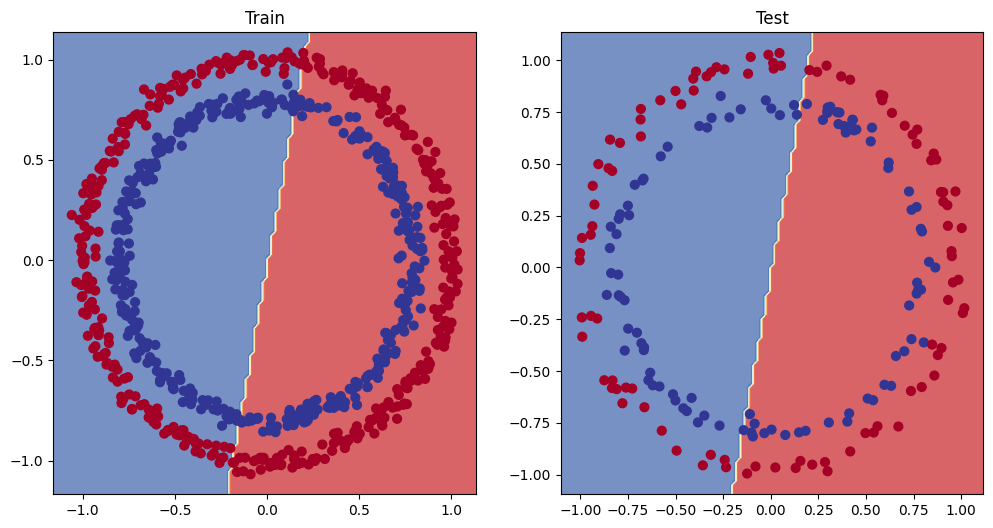

In [25]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add mode layers - give the model more chance to learn aboujt pattern in the data
* Add more hidden layer - go from 5 hiden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data

And because thes options are all values we(as ML E or DS ) can change, they are referred as **hyperparameters**.

In [26]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features =10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_Acc = accuracy_fn(y_true=y_test,
                        y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69299, Test acc: 48.50%
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69299, Test acc: 48.50%


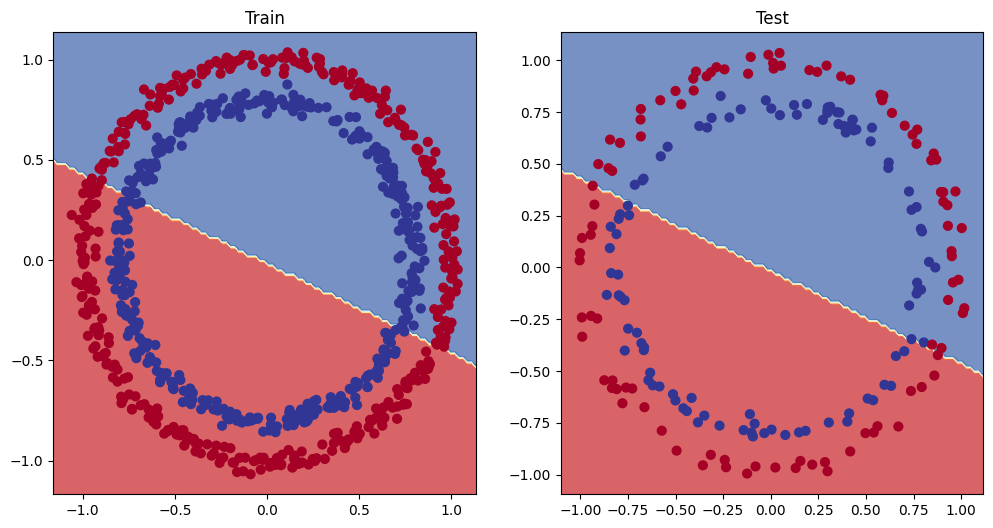

In [29]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot is to test our smaller problem

In [30]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression , y_test_regression = X_regression[:train_split], y_regression[train_split:]
X_test_regression , y_train_regression = X_regression[train_split:], y_regression[:train_split]

# Check len
len(X_train_regression) , len(y_train_regression), len(X_test_regression), len(y_test_regression)


(80, 80, 20, 20)

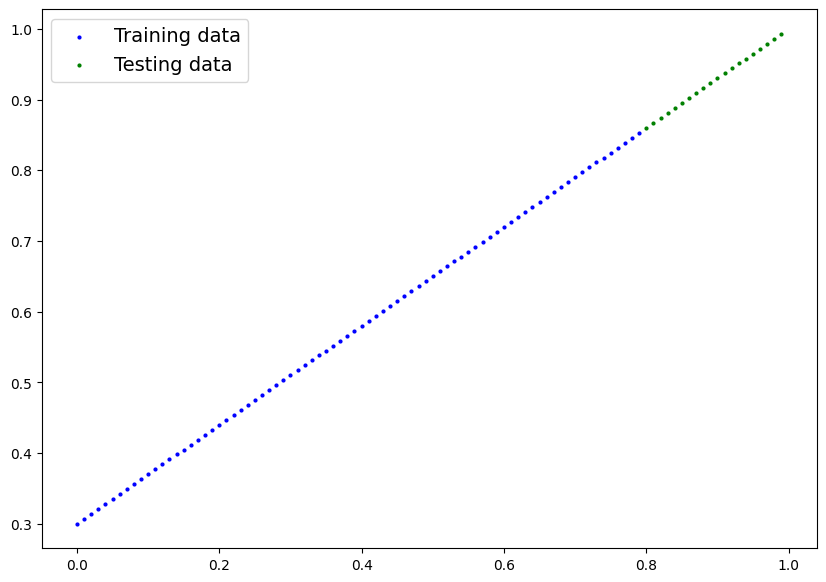

In [36]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [42]:
# Same architecture as model_1

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
#Loss optim
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [45]:
# Train
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#epoch
epochs = 1000

# Put data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.06466, Acc: 51.00 | Test loss: 0.02598, Test acc: 48.50%
Epoch: 100 | Loss: 0.05518, Acc: 51.00 | Test loss: 0.00679, Test acc: 48.50%
Epoch: 200 | Loss: 0.07117, Acc: 51.00 | Test loss: 0.01923, Test acc: 48.50%
Epoch: 300 | Loss: 0.05287, Acc: 51.00 | Test loss: 0.00530, Test acc: 48.50%
Epoch: 400 | Loss: 0.07116, Acc: 51.00 | Test loss: 0.00436, Test acc: 48.50%
Epoch: 500 | Loss: 0.04987, Acc: 51.00 | Test loss: 0.00735, Test acc: 48.50%
Epoch: 600 | Loss: 0.04989, Acc: 51.00 | Test loss: 0.00927, Test acc: 48.50%
Epoch: 700 | Loss: 0.05846, Acc: 51.00 | Test loss: 0.00987, Test acc: 48.50%
Epoch: 800 | Loss: 0.05230, Acc: 51.00 | Test loss: 0.00454, Test acc: 48.50%
Epoch: 900 | Loss: 0.04446, Acc: 51.00 | Test loss: 0.02777, Test acc: 48.50%


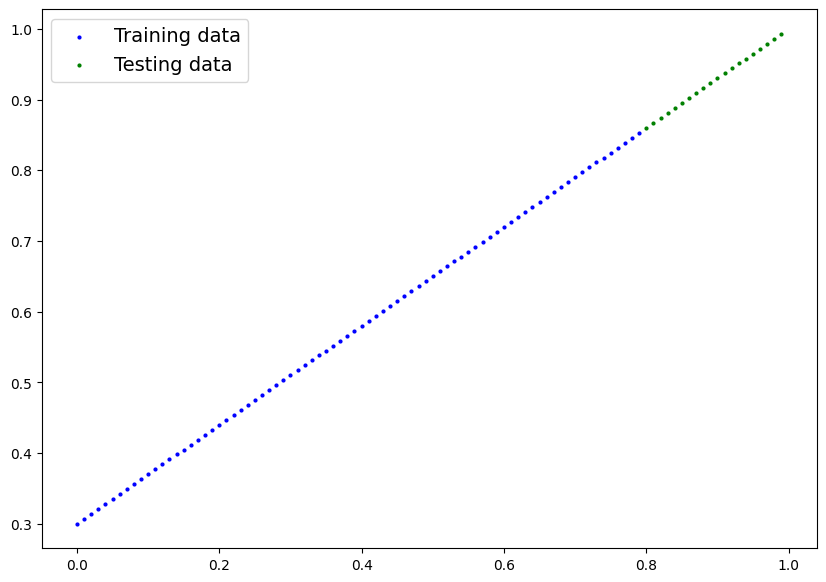

In [46]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                train_labels=y_train_regression.cpu(),
                test_data=X_test_regression.cpu(),
                test_labels=y_test_regression.cpu())

## 6. The missing piece : non-linearity

### 6. Recreating non-linear data

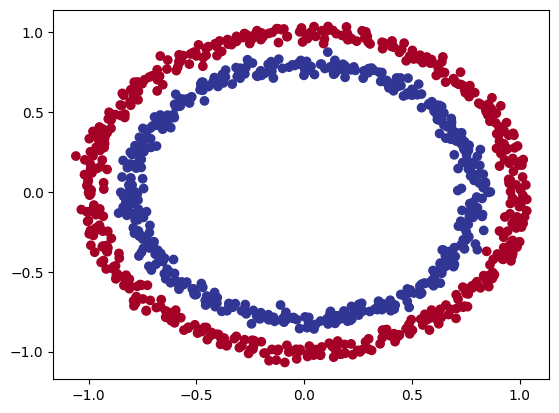

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [49]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

### 6.2 Building a model with non-linearity

In [67]:
# Build model
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [68]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adagrad(model_3.parameters(),
                            lr=0.1)

### 6.3 Training model with non-linearrity

In [69]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_Acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Acc: 50.00 | Test loss: 0.69394, Test acc: 48.50%
Epoch: 100 | Loss: 0.14215, Acc: 100.00 | Test loss: 0.17252, Test acc: 48.50%
Epoch: 200 | Loss: 0.05254, Acc: 100.00 | Test loss: 0.07895, Test acc: 48.50%
Epoch: 300 | Loss: 0.02898, Acc: 100.00 | Test loss: 0.05311, Test acc: 48.50%
Epoch: 400 | Loss: 0.01279, Acc: 100.00 | Test loss: 0.02694, Test acc: 48.50%
Epoch: 500 | Loss: 0.00766, Acc: 100.00 | Test loss: 0.01822, Test acc: 48.50%
Epoch: 600 | Loss: 0.00544, Acc: 100.00 | Test loss: 0.01431, Test acc: 48.50%
Epoch: 700 | Loss: 0.00418, Acc: 100.00 | Test loss: 0.01182, Test acc: 48.50%
Epoch: 800 | Loss: 0.00338, Acc: 100.00 | Test loss: 0.01012, Test acc: 48.50%
Epoch: 900 | Loss: 0.00282, Acc: 100.00 | Test loss: 0.00891, Test acc: 48.50%


### 6.4 Visulization

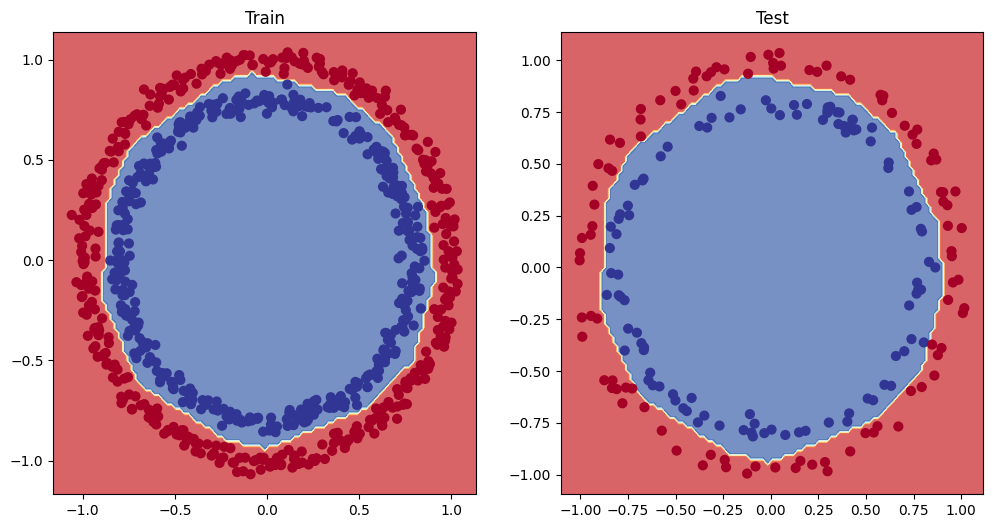

In [70]:
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation function

In [71]:
# Create a tensor
A = torch.arange(-10, 10 , 1, dtype=torch.float32)

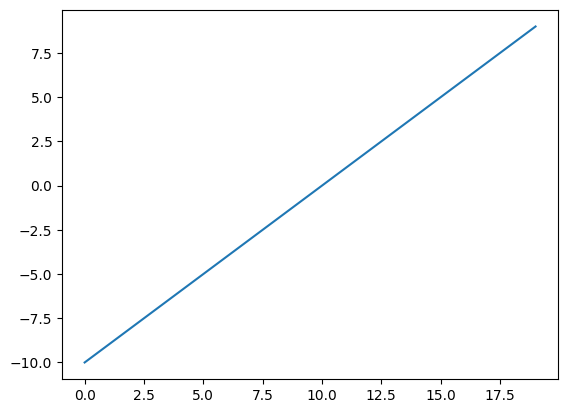

In [72]:
plt.plot(A);

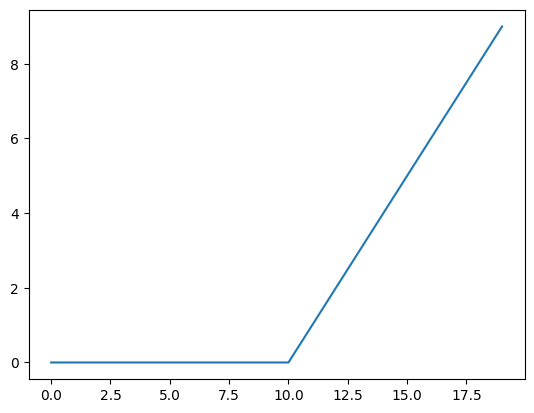

In [73]:
plt.plot(torch.relu(A))

In [75]:
def relu(x : torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

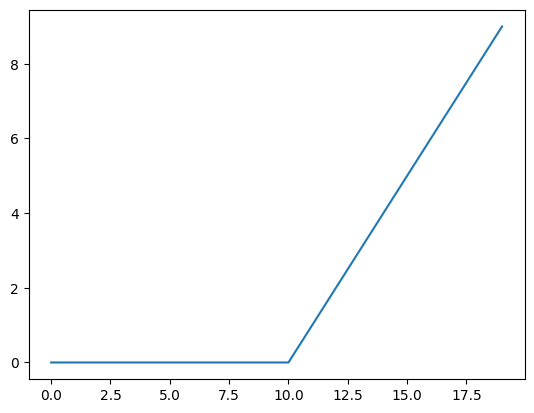

In [76]:
plt.plot(relu(A))

In [79]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))



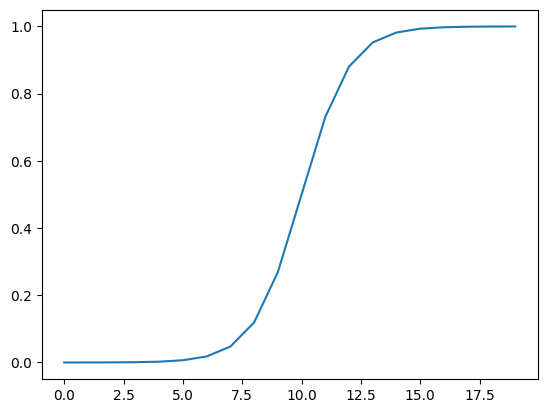

In [77]:
plt.plot(torch.sigmoid(A))

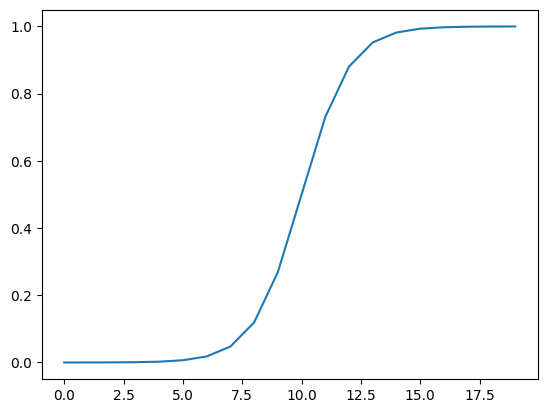

In [80]:
plt.plot(sigmoid(A))

## 8. Putting it all together with multi-class classification

### 8.1 Creating a toy multi-class dataset

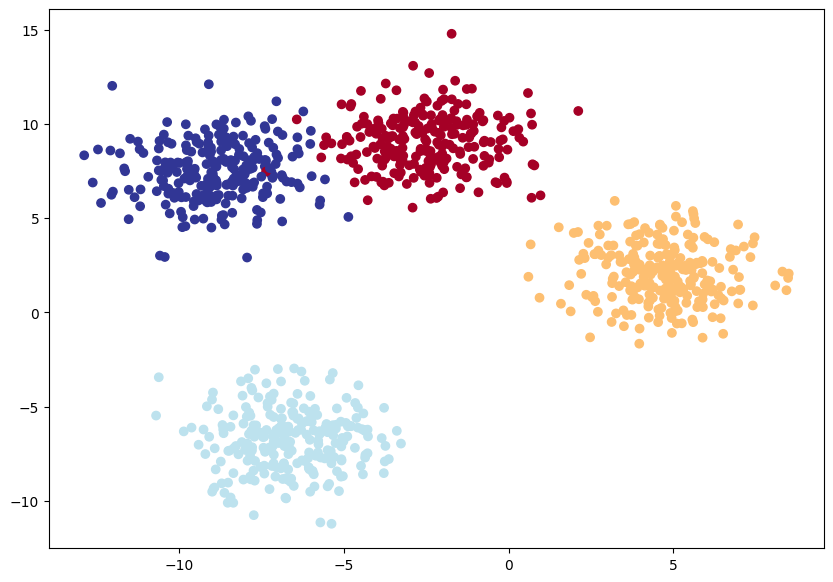

In [86]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create muliti-class
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. turn to tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. split data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [87]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [101]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, out_features, hidden_units=8):
    """Initialize muli-class model

    Arg:
      input_feature(int) : Number of input feature to the model
      output_feature(int) : Number of outputs features
      hidden_units(int) : Number of hidden units between layers, default 8

    Return :

    Example :

    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    out_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 loss optim

In CrossEntropy if there is imbalance data, we can use weight.

In [98]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)



### 8.4 Getting prediction probabilities for multi-class PyTorch model

Logits(raw output of model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probability)

In [102]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.6588,  0.5763, -0.6314, -0.6622],
        [-0.0517,  0.1994, -0.3462, -0.5284],
        [-0.9738,  1.1452, -0.2946, -0.3830],
        [-0.5943,  0.5736, -0.4700, -0.4959],
        [-0.2184,  0.3098, -0.3085, -0.4755],
        [-0.0938,  0.1500, -0.3626, -0.6027],
        [-1.1117,  1.1671, -0.2924, -0.3895],
        [-0.0397,  0.2902, -0.2233, -0.3317],
        [-0.9128,  1.1848, -0.2759, -0.3822],
        [-0.0943,  0.2936, -0.2445, -0.3742]], device='cuda:0')

In [103]:
# Convert logit output to predictionprobability
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.6588,  0.5763, -0.6314, -0.6622],
        [-0.0517,  0.1994, -0.3462, -0.5284],
        [-0.9738,  1.1452, -0.2946, -0.3830],
        [-0.5943,  0.5736, -0.4700, -0.4959],
        [-0.2184,  0.3098, -0.3085, -0.4755]], device='cuda:0')
tensor([[0.1547, 0.5320, 0.1590, 0.1542],
        [0.2739, 0.3521, 0.2040, 0.1700],
        [0.0763, 0.6353, 0.1506, 0.1378],
        [0.1550, 0.4984, 0.1755, 0.1710],
        [0.2282, 0.3869, 0.2085, 0.1764]], device='cuda:0')


### 8.5 Creating training loop